In [ ]:
%pip install yfinance
%pip install numpy matplotlib

In [ ]:
import yfinance as yf

assets = ['GOOG', 'AAPL', 'BTC-USD', 'ETH-USD']
start_date = '2023-01-01'
end_date = '2023-12-31'
data = yf.download(assets, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  4 of 4 completed


Price                       Adj Close                                         \
Ticker                           AAPL       BTC-USD      ETH-USD        GOOG   
Date                                                                           
2023-01-01 00:00:00+00:00         NaN  16625.080078  1200.964844         NaN   
2023-01-02 00:00:00+00:00         NaN  16688.470703  1214.656616         NaN   
2023-01-03 00:00:00+00:00  123.904633  16679.857422  1214.778809   89.480247   
2023-01-04 00:00:00+00:00  125.182610  16863.238281  1256.526611   88.492683   
2023-01-05 00:00:00+00:00  123.855095  16836.736328  1250.438599   86.557426   
...                               ...           ...          ...         ...   
2023-12-26 00:00:00+00:00  192.320221  42520.402344  2231.465332  142.470123   
2023-12-27 00:00:00+00:00  192.419830  43442.855469  2378.739990  141.093506   
2023-12-28 00:00:00+00:00  192.848221  42627.855469  2347.566162  140.933899   
2023-12-29 00:00:00+00:00  191.802170  4

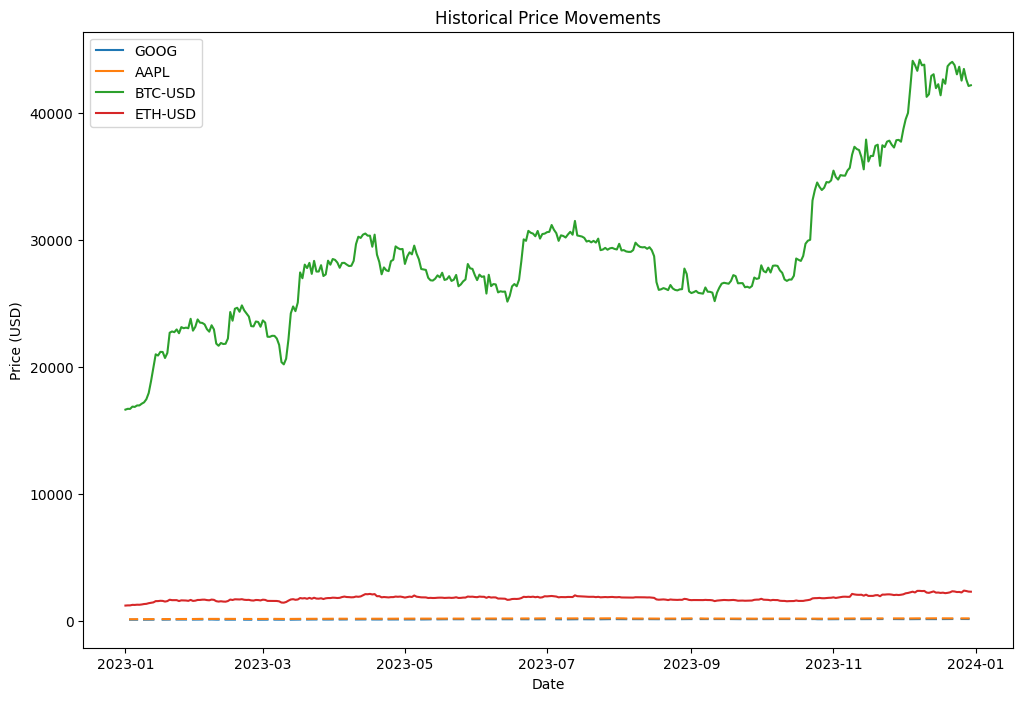

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the price movements of the selected assets
plt.figure(figsize=(12,8))
for asset in assets:
  plt.plot(data['Close'][asset], label=asset)

plt.title('Historical Price Movements')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.show()

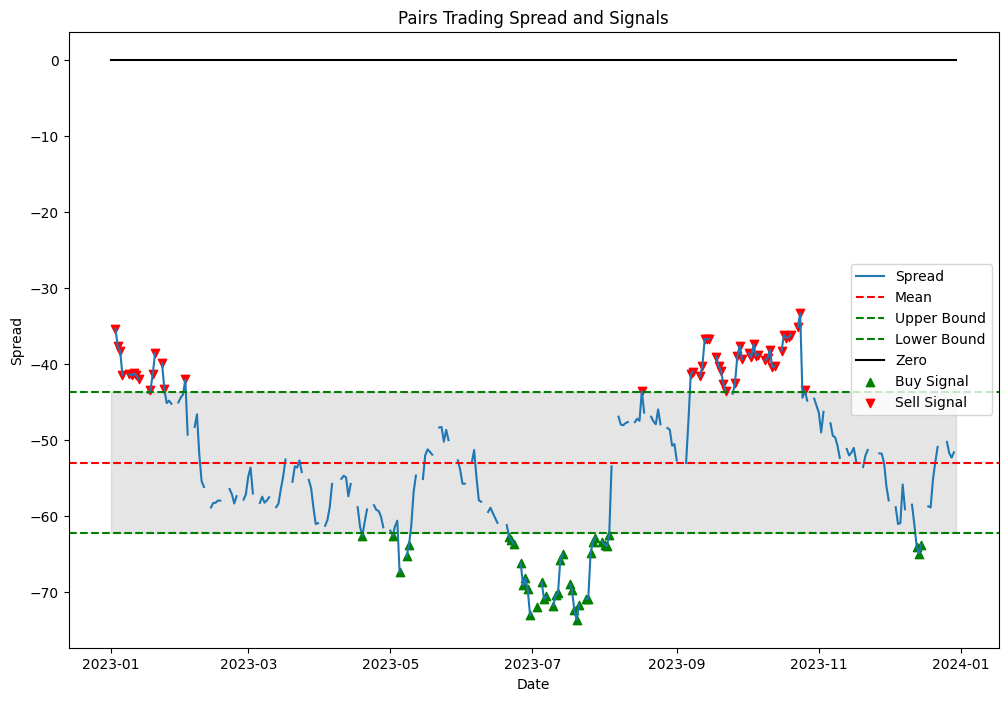

In [ ]:
import numpy as np

# Implementing a simple pairs trading strategy
asset1 = 'GOOG'
asset2 = 'AAPL'

spread = data['Close'][asset1] - data['Close'][asset2]
spread_mean = np.mean(spread)
spread_std = np.std(spread)

# Generating buy/sell signals based on the spread
z_score = (spread - spread_mean) / spread_std
buy_signal = z_score < -1.0
sell_signal = z_score > 1.0

# Visualizing the spread and buy/sell signals
plt.figure(figsize=(12, 8))
plt.plot(spread, label='Spread')
plt.axhline(spread_mean, color='r', linestyle='--', label='Mean')
plt.axhline(spread_mean + spread_std, color='g', linestyle='--', label='Upper Bound')
plt.axhline(spread_mean - spread_std, color='g', linestyle='--', label='Lower Bound')
plt.fill_between(spread.index, spread_mean + spread_std, spread_mean - spread_std, color='gray', alpha=0.2)
plt.plot(spread.index, np.zeros(len(spread)), 'k-', label='Zero')
plt.scatter(spread[buy_signal].index, spread[buy_signal], marker='^', color='g', label='Buy Signal')
plt.scatter(spread[sell_signal].index, spread[sell_signal], marker='v', color='r', label='Sell Signal')
plt.title('Pairs Trading Spread and Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()

plt.show()

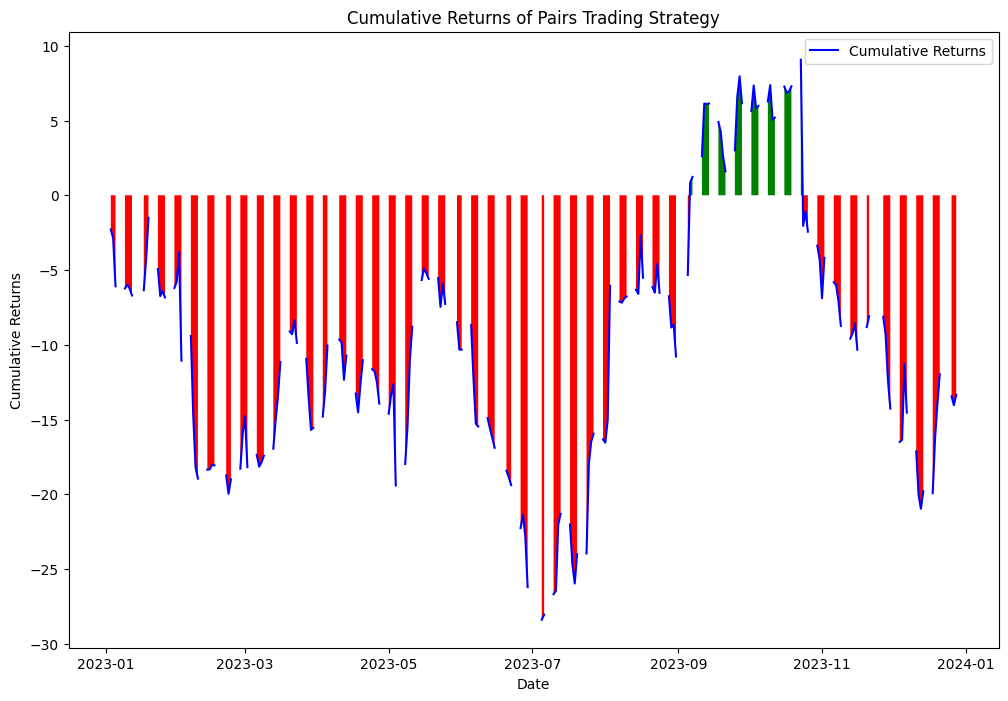

In [ ]:
# Backtesting the pairs trading strategy
returns = spread.shift(-1) - spread
cumulative_returns = returns.cumsum()

# Visualizing the cumulative returns
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label='Cumulative Returns', color='b')
plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns >= 0), facecolor='green', interpolate=True)
plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns <= 0), facecolor='red', interpolate=True)
plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.show()